In [28]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm

%matplotlib inline

In [7]:
song_path = "./data_mini/track_features/tf_mini.csv"
playlist_path = "./data_mini/training_set/log_mini.csv"

In [8]:
pd_playlist = pd.read_csv(playlist_path)

In [9]:
pd_song = pd.read_csv(song_path)

In [10]:
pd_playlist_copy = pd_playlist.copy()
pd_playlist_copy = pd_playlist_copy.rename(columns={"track_id_clean": "track_id"})
#pd_merged = pd.merge_ordered(pd_playlist_copy, pd_song, on="track_id")

In [11]:
def mergeLeftInOrder(x, y, on=None):
    x = x.copy()
    x["Order"] = np.arange(len(x))
    z = x.merge(y, how='left', on=on).set_index("Order").ix[np.arange(len(x)), :]
    return z.reset_index(drop=True)

In [12]:
tmp = mergeLeftInOrder(pd_playlist_copy, pd_song, on="track_id")

/Users/ken/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


In [13]:
tmp.head()

,session_id,session_position,session_length,track_id,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,...,4,0.152255,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0,1,...,4,0.337152,-0.713646,0.363718,0.310315,-0.042222,-0.383164,0.066357,-0.365308,0.157920
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0,1,...,4,0.373862,-0.742541,0.375599,0.252660,-0.049007,-0.299745,0.063341,-0.486689,0.181604
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,False,False,True,0,1,...,4,0.649420,-0.705116,0.317562,0.289141,-0.038920,-0.393358,0.092719,-0.364418,0.285603
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,False,False,True,0,1,...,4,0.652921,-0.868489,0.331280,0.210478,0.084740,-0.333287,-0.025706,-0.510350,0.182315


In [20]:
track = tmp.drop(['session_position', 'session_length', 
       'skip_1', 'skip_2', 'skip_3', 'not_skipped', 'context_switch',
       'no_pause_before_play', 'short_pause_before_play',
       'long_pause_before_play', 'hist_user_behavior_n_seekfwd',
       'hist_user_behavior_n_seekback', 'hist_user_behavior_is_shuffle',
       'hour_of_day', 'date', 'premium', 'context_type',
       'hist_user_behavior_reason_start', 'hist_user_behavior_reason_end'], axis=1)

In [29]:
track_grouped = track.groupby("session_id")
sessions = []
for item in tqdm(pd_playlist["session_id"].drop_duplicates()):
    chk = track_grouped.get_group(item)
    L_s = len(chk)
    for i in range(20-L_s):
        s = pd.Series([0]*31, index=chk.columns, name='zero')
        chk = chk.append(s)
    sessions.append(chk.drop(["session_id", "track_id"], axis=1))

100%|██████████| 10000/10000 [02:17<00:00, 72.69it/s]


In [53]:
k_y = tmp[["session_id", "skip_2"]]
ky_grouped = k_y.groupby("session_id")
kys = []
for item in tqdm(k_y["session_id"].drop_duplicates()):
    chk = ky_grouped.get_group(item)
    L_s = len(chk)
    L_sh = int(L_s/2)
    ky_tmp = np.array(chk["skip_2"])*2-1
    ky_tmp = np.tile(ky_tmp.reshape((-1,1)), (1,2))
    ky_tmp[:L_sh,1] = 0
    ky_tmp[L_sh:,0] = 0
    kys.append(np.pad(ky_tmp, [(0,20-L_s),(0,0)], 'constant')) 

100%|██████████| 10000/10000 [00:06<00:00, 1628.11it/s]


In [55]:
kys[0]

array([[-1,  0],
       [-1,  0],
       [-1,  0],
       [-1,  0],
       [-1,  0],
       [-1,  0],
       [ 1,  0],
       [ 1,  0],
       [ 1,  0],
       [ 1,  0],
       [ 0,  1],
       [ 0,  1],
       [ 0,  1],
       [ 0, -1],
       [ 0,  1],
       [ 0,  1],
       [ 0,  1],
       [ 0,  1],
       [ 0,  1],
       [ 0,  1]])

In [ ]:
# TODO
# adjust the data file paths to the current (github) directory
# make the above more (time-)efficient code
#   maybe making a method or class would be better? 
# each element in "sessions" must be ndarray
# some of the columns in each element in "sessions" should be one-hot encoded (ex. published year)
# write a script for saving these outputs

In [26]:
#list(pd_playlist.groupby("session_id").groups.keys())
pd_playlist_grouped = pd_playlist.groupby("session_id")
ana_1 = []
for item in pd_playlist["session_id"].drop_duplicates():
    chk = pd_playlist_grouped.get_group(item)
    L_s = int(chk.iloc[0, 2]/2)
    h_1 = sum(chk["skip_2"].iloc[:L_s])
    h_2 = sum(chk["skip_2"].iloc[L_s:])
    ana_1.append([h_1, h_2])

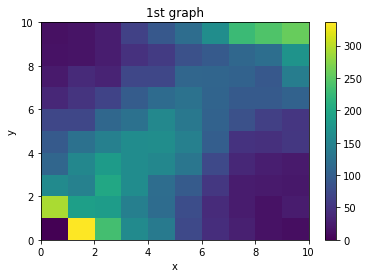

In [32]:
ana_1 = np.array(ana_1)

fig = plt.figure()
ax = fig.add_subplot(111)

H = ax.hist2d(ana_1[:,0], ana_1[:,1], bins=10)
ax.set_title('1st graph')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(H[3],ax=ax)